In [137]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris




In [138]:
#load features and labels 
features = np.load("EEG_features.npy")

#flatten features 
features=features.reshape(len(features),-1)
print(features.shape)

labels = np.load("labels.npy")

#turn off shuffle to avoid data leakage 
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, shuffle=False)


(391, 544)


In [139]:
#apply standard scaling across features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#create RF classifier 
classifier = RandomForestClassifier(n_estimators=50, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


NameError: name 'x_test' is not defined

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)



Accuracy: 100.00%
[[ 74   0   0]
 [  0  29   0]
 [  0   0 170]]


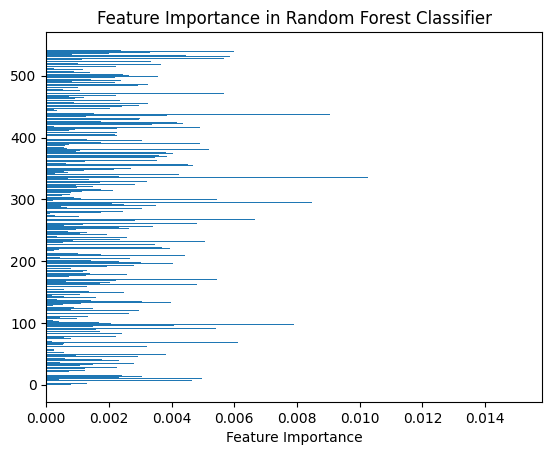

In [142]:
feature_importances = classifier.feature_importances_
feature_label = np.arange(0,len(X_train[0]))
plt.barh(feature_label, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()
